feature shape:  (60000, 28, 28)
label shape:  (60000,)


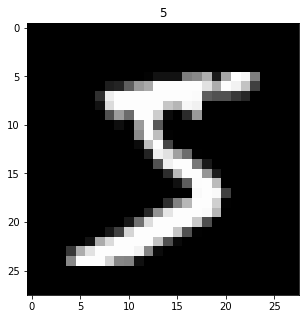

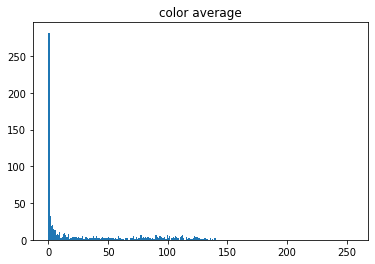

In [1]:
# 查看原始資料

from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import pandas as pd



train, test = datasets.mnist.load_data()
train_x, train_y = train
print('feature shape: ', train_x.shape)
print('label shape: ', train_y.shape)
img = train_x[0]
plt.figure(figsize=(5, 5))
plt.imshow(img, 'gray')
plt.title(train_y[0])
plt.show()

avg = train_x.reshape(-1, 28*28).mean(axis=0)

plt.hist(avg, bins=list(range(256)))
plt.title('color average')
plt.show()

In [2]:
import numpy as np


def one_hot(arr, n):
    arr = arr.reshape(-1)
    m = np.zeros(shape=(len(arr), n))
    
    for i, e in enumerate(arr):
        m[i][e] = 1
        
    return m



# 將資料樣式轉換成模型可接受樣式

train_x = train_x.astype('float64').reshape(-1, 28*28)/255
#train_y = one_hot(train_y, 10)

print('feature type: ', train_x.dtype)
print('label shape: ', train_y.shape)

feature type:  float64
label shape:  (60000,)


In [3]:
# 模型訓練

from sklearn.linear_model import SGDClassifier

net = SGDClassifier(random_state=42)
net.fit(train_x, train_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# 評估函數(Evaluate function)





# Evaluate function 與 Cost function 差異

我們透過設計優雅的cost function幫助我們量化模型的學習效果進行模型訓練，某種程度來說我們可以用學習效果的好壞來當作評估一個模型的好壞，為何還特別需要evaluate function呢?

因為我們往往會在cost function內應用一些技巧幫助增強學習效果，而且學習效果無法盡然的表達一個模型的好壞，我們能說**學習效果很好的模型是不錯的模型，然而不代表學習效果不好的模型就是壞模型。** 

在某些特定任務中，我們無法做出100%的預測時，我們可以折衷對於某些結果有特別高的要求。例如一個判斷是否癌症的系統，我們可能無法做出非常高的預測，但是大家比較能接受有癌症被判斷成無癌症，大於無癌症被判斷成有癌症。如果是兒童色情守門員，相信家長希望完全不要有機會讓兒童瀏覽到色情網站，那怕有些正常的網站被誤判。

因此evaluate function的目的是為了幫助我們更好的評估該模型對於我們要處理問題的好壞程度。


# 常見的Evaluate function--Accuracy、Precision、Recall 



## Accuracy(準確率)

accuracy(準確率)是一個常用來評估分類器好壞的常用方法，但是它並不是一個很好的方法。舉例: 我們要預測一張圖中有沒有貓，我們給了模型1000張照片其中800張不是貓。經過訓練後我們發現模型對訓練集的準確率約80%，但是在真實環境中奇慘無比，這是因為數據是偏斜的，所以只要一味的猜不是貓就能有80%的準確率。 **這也告訴我們accuracy往往無法作為評估模型好壞的方式。** 




## Precision(精度)

透過公式我們可以知道，所謂的精度就是當預測為該類時，答案也確實為該類的機率。


## 公式:

![](imgs/basic_prob.png)


## $$ Precision = \frac{TP}{TP+FP} $$



## Recall(招回率)

recall 在統計學上又叫 Sensitivity，指的是在所有的真實該類中有被預測是該類的機率。

## 公式:

## $$ Recall = \frac{TP}{TP+TN} $$


# Precision 與 Recall 的權衡:

從上面的公式中我們得知如何提高precision，**降低沒有把握的預測**也就是減少False-Positive的量。

那如何提高Recall呢，當然就是減少true-Negative的量阿，也就是**寧可錯殺不可放過**對於沒有把握的預測就當做是postitve好了。

我們會發現precision與recall採取的是相反的策略，單一的percision或recall都容易對evaluation產生錯估的情形，所以我們通常以F1 score作為綜合評估，單純的precision或recall都會導致f1_score下降，只有precision與recall都很高，f1_score的分數才會高:


## $$ \frac{2}{F1} = \frac{1}{Precision}+\frac{1}{Recall}$$

## $$ F1\_score = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} = 2 * \frac{Precision * Recall}{Precision + Recall}$$


### 含加權的fl score:

## $$ F1\_score = \frac{1+\alpha}{\frac{1}{\alpha * Precision} + \frac{1}{Recall}} $$

因為權重必>=0，以$\beta^2$取代$\alpha$:

而且我們能發現${\beta^2}<{1}, {\beta^2}\to{0}$結果會趨近於Precision; ${\beta^2}>{1}, {\beta^2}\to{\infty}$結果會趨近於Recall

## $$ F1\_score = \frac{1+\beta^2}{\frac{1}{\beta^2 * Precision} + \frac{1}{Recall}} = (1+\beta^2) * \frac{Precision*Recall}{\beta^2*Precision + Recall} $$



如果你仔細看F1 score，你會發現它的平均方法是「調和平均」，帶大家go-through三種平均方法，你就能明白為什麼要使用調和平均了。下圖列出了三種平均方法的使用時機，我們要去了解資料或數列的特性，我們才能知道要採取哪種平均方法較為恰當，大多情況算數平均都可以使用，因為我們都假設有線性關係存在，譬如說平均距離；幾何平均常用於人口計算，因為人口增加是成比例增加的；調和平均常用於計算平均速率，在固定距離下，所花時間就是平均速率，這數據成倒數關係，而F1 Measure也同樣是這樣的數據特性，**在固定TP的情況下，有不同的分母，所以這裡使用調和平均較為適當**。



![](imgs/measure.jpeg)







# 混淆矩陣(confusion matrix)

混淆矩陣是一種評估模型的方法，row對應的是真實類別，column對應的是預測的類別，如此一來我們就能知道很多資訊例如:哪真實類別特別容易被誤判成哪格類別等等，而我們更可以透過confusion matrix快速計算出 precision或recall等等




In [4]:
# 測試資料

test_x, test_y = test
test_x = test_x.astype('float64').reshape(-1, 28*28)/255


yhat = net.predict(test_x)

In [5]:
def precision(m):
    m = np.array(m)
    arr = []
    
    for i in range(len(m)):
        p = m[i][i]/np.sum(m[:, i].reshape(-1))
        arr.append(p)
    return np.array(arr)

def recall(m):
    m = np.array(m)
    arr = []
    for i in range(len(m)):
        r = m[i][i]/np.sum(m[i, :].reshape(-1))
        arr.append(r)
    return np.array(arr)

def f1_score(m, alpha=1):
    prec = precision(m)
    re = recall(m)
    return (1+alpha) * (prec*re)/(alpha*prec + re)

In [6]:
# 產生confusion matrix


from sklearn.metrics import confusion_matrix

confusion_m = confusion_matrix(test_y, yhat)
confusion_m

array([[ 956,    0,    2,    2,    0,    3,   12,    3,    1,    1],
       [   0, 1112,    3,    1,    0,    3,    5,    1,   10,    0],
       [   8,    5,  934,   13,    6,    2,   14,   13,   33,    4],
       [   5,    0,   26,  902,    2,   30,    3,   13,   21,    8],
       [   1,    3,    5,    0,  888,    0,   20,    5,    8,   52],
       [  12,    3,    1,   24,   12,  777,   24,    5,   27,    7],
       [   7,    3,    6,    2,    6,    7,  925,    0,    2,    0],
       [   2,    8,   23,    3,    7,    1,    1,  949,    3,   31],
       [  12,   12,    8,   17,   15,   38,   11,   14,  834,   13],
       [  10,    8,    2,   17,   28,   12,    0,   27,    8,  897]])

In [7]:
precision(confusion_m)

array([0.94373149, 0.96360485, 0.92475248, 0.91946993, 0.92116183,
       0.89003436, 0.91133005, 0.92135922, 0.88067582, 0.88548865])

In [8]:
recall(confusion_m)

array([0.9755102 , 0.97973568, 0.90503876, 0.89306931, 0.90427699,
       0.87107623, 0.96555324, 0.92315175, 0.85626283, 0.88899901])

In [9]:
f1_score(confusion_m)

array([0.95935775, 0.97160332, 0.91478942, 0.90607735, 0.91264132,
       0.88045326, 0.93765839, 0.92225462, 0.86829776, 0.88724036])